In [7]:
import os
import numpy as np
import re #Import regular expression to process emails
from matplotlib import pyplot
from scipy import optimize
from scipy.io import loadmat
%matplotlib inline


In [8]:
def findClosestCentroids(X,centroids):
    #shape of one centroid will be of n dimension, a point in n dimension.
    #total k cluster and each cluster is of n dimension K*n
    K=centroids.shape[0]
    idx=np.zeros(X.shape[0],dtype=int)
    for i in range(0,X.shape[0]):
        j=np.sqrt(np.sum(np.square(X[i]-centroids),axis=1))
        #broadcast of X[i] so that its shape become k*n
        idx[i]=np.argmin(j)
    return idx
data=loadmat('ex7data2.mat')
print(data.keys())
X=data['X']
print(X.shape)
#print(X)
K=3
initial_centroids=np.array([[3,3],[6,2],[8,5]])
idx=findClosestCentroids(X,initial_centroids)
print(idx)
        
    

dict_keys(['__header__', '__version__', '__globals__', 'X'])
(300, 2)
[0 2 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0
 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2
 1 1 1 0]


In [9]:
def computeCentroids(X,idx,K):
    m,n=X.shape
    centroids=np.zeros((K,n))
    for i in np.arange(K):
        centroids[i]=np.mean(X[idx==i],axis=0)
    return centroids
centroids = computeCentroids(X,idx,K)
print(centroids)

[[2.42830111 3.15792418]
 [5.81350331 2.63365645]
 [7.11938687 3.6166844 ]]


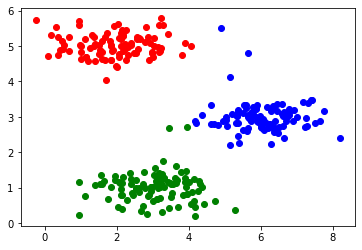

In [12]:
def run_k_means(X,initial_centroids,max_iters):
    m,n=X.shape
    K=initial_centroids.shape[0]
    idx=np.zeros(X.shape[0],dtype=int)
    centroids=initial_centroids
    for i in range(0,max_iters):
        idx=findClosestCentroids(X,centroids)
        centroids=computeCentroids(X,idx,K)
    return idx,centroids
idx,centroids=run_k_means(X,initial_centroids,10)
cluster1=X[idx==0]
cluster2=X[idx==1]
cluster3=X[idx==2]
pyplot.plot(cluster1[:,0],cluster1[:,1],'o',color='red')
pyplot.plot(cluster2[:,0],cluster2[:,1],'o',color='green')
pyplot.plot(cluster3[:,0],cluster3[:,1],'o',color='blue')
pyplot.show()
    

In [15]:
def init_centroids(X,K):
    m,n=X.shape
    centroids=np.zeros((K,n))
    idx=np.random.randint(0,m,K)
    for i in range(0,K):
        centroids[i,:]=X[idx[i],:]
    return centroids
print(init_centroids(X,3))

[[6.99198434 2.98706729]
 [6.20295231 2.67856179]
 [6.11768055 2.85475655]]


dict_keys(['__header__', '__version__', '__globals__', 'A'])
(128, 128, 3)


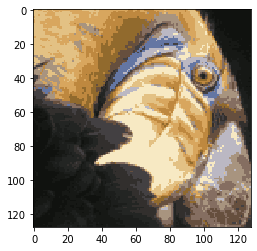

In [20]:
#Image compression with  k means
#each pixel can be represented by rgb value hence 24 bit color representation 
#reduce number of colors to 16
#we need to store rgb value of only 16 colors and for each pixel in image you need to only store index of color at that location (0,16)
# choose 16 clusters such that variances along these directions are maximum
image_data=loadmat('bird_small.mat')
print(image_data.keys())
A=image_data['A']
print(A.shape)
#128 columns, 128 rows and each cell represent pixels and hence 3 values
A=A/255
X=A.reshape(-1,3)
K=16
initial_centroids=init_centroids(X,16)
idx,centroids=run_k_means(X,initial_centroids,10)
idx=findClosestCentroids(X,centroids)
X_recovered=centroids[idx.astype(int),:]
X_recovered=np.reshape(X_recovered,(A.shape[0],A.shape[1],A.shape[2]))
pyplot.imshow(X_recovered)

(50, 2)


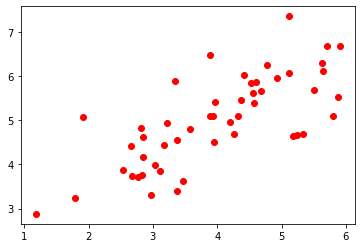

In [44]:
#PCA principal component analysis
data =loadmat("ex7data1.mat")
data.keys()
X=data['X']
print(X.shape)
pyplot.plot(X[:,0],X[:,1],'o',color='red')


In [49]:
def pca(X):
    m,n=X.shape
    Sigma=(1/m)*(X.T.dot(X))
    #X=USV^T where U^TU=I and V^TV=I
    # At.A=V.S.Ut.U.S.Vt=V.S2.Vt
    #At.A.V=V.S2
    #A'.V=V.S2
    #At.A=matrix M 
    # V holds the eigen vectors of At.A and S holds the square root of all eigenvalues of At.A
    # U=eigen vectors of A.At i.e n*n 
    # but bcoz we have taken dot of At.A, U will hold eigen vectors of At.A 
    # V=eigen vectors of At.A i.e p*p
    # S eigen values of shape n*p total p eigen values for V matrix
    U= np.zeros(n)
    S=np.zeros(n)
    U,S,V=np.linalg.svd(Sigma)
    return U,S

[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]
[1.73553038 0.26446962]
-0.7071067811865472   -0.7071067811865474


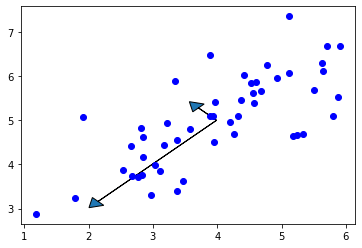

In [50]:
def featureNormalize(X):
    mu=np.mean(X,axis=0)
    sigma=np.std(X,axis=0)
    X_res=np.zeros(X.shape)
    X_res=(X-mu)/sigma
    return X_res,mu,sigma
X_norm,mu,sigma=featureNormalize(X)
U,S=pca(X_norm)
print(U)
print(S)
pyplot.plot(X[:,0],X[:,1],'o',color='blue')
#pyplot.arrow(x,y,dx,dy): x+dx to y+dy
for i in range(2):
    pyplot.arrow(mu[0],mu[1],1.5*S[i]*U[0,i],1.5*S[i]*U[1,i],head_width=0.25,head_length=0.2)

print(U[0,0]," ",U[1,0])

In [51]:
#Projecting the data onto Principal Component
def projectData(X,U,K):
    Z=np.zeros((X.shape[0],K))
    Z=np.dot(X,U[:,:K])
    return Z
K=1
Z=projectData(X_norm,U,K)
print(Z)

[[ 1.49631261]
 [-0.92218067]
 [ 1.22439232]
 [ 1.64386173]
 [ 1.2732206 ]
 [-0.97681976]
 [ 1.26881187]
 [-2.34148278]
 [-0.02999141]
 [-0.78171789]
 [-0.6316777 ]
 [-0.55280135]
 [-0.0896816 ]
 [-0.5258541 ]
 [ 1.56415455]
 [-1.91610366]
 [-0.88679735]
 [ 0.95607375]
 [-2.32995679]
 [-0.47793862]
 [-2.21747195]
 [ 0.38900633]
 [-1.78482346]
 [ 0.05175486]
 [ 1.66512392]
 [ 0.50813572]
 [-1.23711018]
 [-1.17198677]
 [ 0.84221686]
 [-0.00693174]
 [-0.22794195]
 [-1.51309518]
 [ 1.33874082]
 [-0.5925244 ]
 [ 0.67907605]
 [-1.35298   ]
 [ 1.68749495]
 [-1.39235931]
 [ 2.55992598]
 [-0.27850702]
 [-0.97677692]
 [ 0.88820006]
 [ 1.29666127]
 [-0.98966774]
 [ 1.81272352]
 [-0.27196356]
 [ 3.19297722]
 [ 1.21299151]
 [ 0.36792871]
 [-1.44264131]]


In [52]:
def recoverData(Z,U,K):
    X_rec=np.zeros((Z.shape[0],U.shape[0]))
    X_rec=Z.dot(U[:,:K].T)
    return X_rec
X_rec=recoverData(Z,U,K)
print(X_rec[0,0]," ",X_rec[0,1])

-1.0580527922154777   -1.0580527922154777


dict_keys(['__header__', '__version__', '__globals__', 'X'])
(5000, 1024)
(10, 1024)


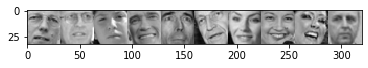

In [76]:
#each 32*32 grayscale images
# a row vector of length 1024 - 1 image
data=loadmat('ex7faces.mat')
print(data.keys())
X1=data['X']
print(X1.shape)
#print(X1[0:5,:])
m=X1.shape[0]
random_indices=np.random.choice(m,10,replace=False)
demo_pic=X1[random_indices,:]
#print(X[random_indices,:])
print(demo_pic.shape)
pyplot.imshow(demo_pic.reshape(-1,32).T,aspect='equal',cmap='gray')
pyplot.axis=False
#Another way to plot images
#show 100 images
    


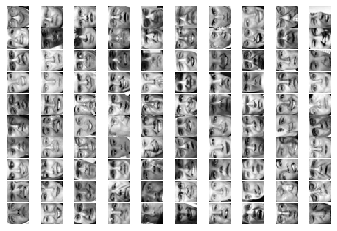

In [77]:
def displayData(X,example_width=None,figsize=(10,10)):
    if X.ndim==2:
        m,n=X.shape
    elif X.ndim==1:
        n=X.size
        m=1
        X=X[None]
        #4*1 size--- initially it's shape was (4,)
    #np.round(arr,decimals=0) decimals places upto roundoff should be done
    example_width=int(np.round(np.sqrt(n)))
    example_height=int(n/example_width)
    # 1 pic ka kya height aur width hoga using example_width and example_height
    # total row and column simple sqrt(m)*sqrt(m) ke barabar hoga
    display_rows=int(np.floor(np.sqrt(m)))
    display_cols=int(np.ceil(m/display_rows))
    #fig,a =  plt.subplots(2,2)
    #import numpy as np
    #x = np.arange(1,5)
    #a[0][0].plot(x,x*x)
    #a[0][0].set_title('square')
    #a[0][1].plot(x,np.sqrt(x))
    #a[0][1].set_title('square root')
    #a[1][0].plot(x,np.exp(x))
    #a[1][0].set_title('exp')
    #a[1][1].plot(x,np.log10(x))
    #a[1][1].set_title('log')
    #plt.show()
    #subplot mein dimensions dete hai no. of rows*no.of columns
    #subplot mein wspace hspace, space between subplots
    #fig is name for complete figure, ax is array containing subplots
    fig,ax=pyplot.subplots(display_rows,display_cols)
    fig.subplots_adjust(wspace=0.025,hspace=0.025)
    #complete open kar liye ax ko such that same index can give value of both ax and data example
    ax=[ax] if m==1 else ax.ravel()
    for i,ax1 in enumerate(ax):
        #i is index and ax1=ax[i]
        ax1.imshow(X[i].reshape(example_height,example_width),cmap='gray')
        ax1.axis('off')
    
displayData(X1[:100,:])

(1024, 1024)
(5000, 100)


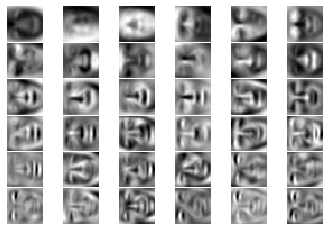

In [81]:
X1_norm,mu1,sigma1=featureNormalize(X1)
U,S=pca(X1_norm)
print(U.shape)
displayData(U[:,:36].T)
K=100
Z=projectData(X1_norm,U,K)
print(Z.shape)


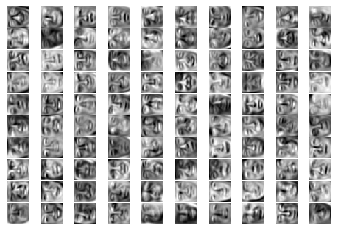

In [82]:
X_rec1=recoverData(Z,U,K)
displayData(X_rec1[:100,:])

dict_keys(['__header__', '__version__', '__globals__', 'A'])
(128, 128, 3)


<IPython.core.display.Javascript object>


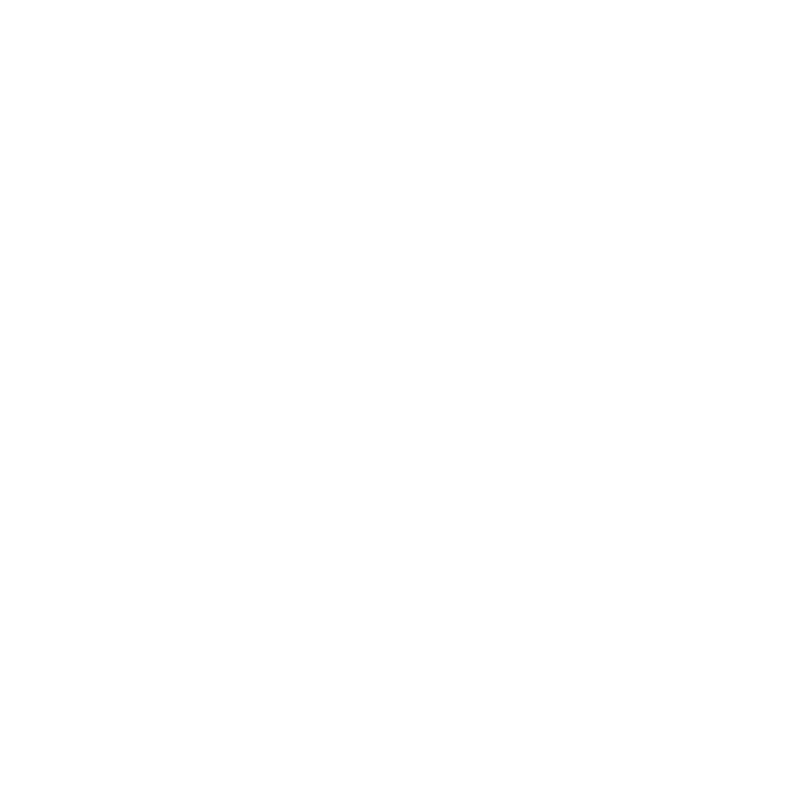

ValueError: Unknown projection "'3d'"

In [88]:
#PCA for VISUALIZATION
#Allows interactive plot to rotate 3-D plot
%matplotlib notebook
%matplotlib notebook
from matplotlib import pyplot
data=loadmat('bird_small.mat')
print(data.keys())
A=data['A']
print(A.shape)
A=A/255
X=A.reshape(-1,3)
K=16
max_iters=10
initial_centroids=init_centroids(X,K)
centroids,idx=run_k_means(X,initial_centroids,max_iters)
sel=np.random.choice(X.shape[0],size=1000)
fig=pyplot.figure(figsize=(8,8))
#add_subplot=111=1,1,1,polar projection or 3D projection
ax=fig.add_subplot(111,projection="'3d'")
ax.scatter(X[sel,0],X[sel,1],X[sel,2],cmap='rainbow',c=idx[sel],s=8**2)
